### Propose a project to do while at The Data Incubator. We want to know about your ability to think at a high level. Try to think of projects that users or businesses will care about that are also relatively unanalyzed. Here are some useful links about data sources on our blog as well as the archive of data sources on Data is Plural. You can see some final projects of previous Fellows on our YouTube Page.

### Propose a project that uses a large, publicly accessible dataset. Explain your motivation for tackling this problem, discuss the data source(s) you are using, and explain the analysis you are performing. At a minimum, you will need to do enough exploratory data analysis to convince someone that the project is viable and generate two interesting non-trivial plots or other assets supporting this. Explain the plots and give url links to them. For guidance on how to choose a project, check out this blog post.

In [16]:
import pandas as pd
import numpy as np

In [24]:
raw_data = pd.read_csv("International_Ed/data.csv")
print(raw_data.columns)
print(raw_data.shape)
raw_data.head(2)

Index(['Country Name', 'Country Code', 'Series', 'Series Code',
       '2010 [YR2010]', '2011 [YR2011]', '2012 [YR2012]', '2013 [YR2013]',
       '2014 [YR2014]', '2015 [YR2015]', '2016 [YR2016]', '2017 [YR2017]',
       '2018 [YR2018]', '2019 [YR2019]', '2020 [YR2020]'],
      dtype='object')
(24929, 15)


Country Name Country Code  \
0  Afghanistan          AFG   
1  Afghanistan          AFG   

                                              Series     Series Code  \
0  Human Capital Index (HCI) Score: Female (Scale...  HD.HCI.OVRL.FE   
1  Human Capital Index (HCI) Score: Total (Scale ...     HD.HCI.OVRL   

  2010 [YR2010] 2011 [YR2011] 2012 [YR2012] 2013 [YR2013] 2014 [YR2014]  \
0            ..            ..            ..            ..            ..   
1            ..            ..            ..            ..            ..   

  2015 [YR2015] 2016 [YR2016] 2017 [YR2017] 2018 [YR2018] 2019 [YR2019]  \
0            ..            ..         0.363            ..            ..   
1            ..            ..         0.389            ..            ..   

  2020 [YR2020]  
0            ..  
1            ..

In [25]:
raw_data["Series"].unique()

array(['Human Capital Index (HCI) Score: Female (Scale 0-1)',
       'Human Capital Index (HCI) Score: Total (Scale 0-1)',
       'Human Capital Index (HCI) Score: Male (Scale 0-1)',
       'GDP per capita (current US$)',
       'Unemployment, total (% of total labor force)',
       'Unemployment, female (% of female labor force)',
       'Unemployment, male (% of male labor force)',
       'Personal computers (per 100 people)', 'Labor force, total',
       'Labor force, female (% of total labor force)',
       'Labor force with advanced education, female (% of female labor force)',
       'Labor force with basic education (% of total labor force)',
       'Labor force with basic education, male (% of male labor force)',
       'Labor force with intermediate education, female (% of female labor force)',
       'Labor force with intermediate education, male (% of male labor force)',
       'Labor force with intermediate education (% of total labor force )',
       'Labor force with basi

In [31]:
raw_data["Series Code"].unique()

array(['HD.HCI.OVRL.FE', 'HD.HCI.OVRL', 'HD.HCI.OVRL.MA',
       'NY.GDP.PCAP.CD', 'SL.UEM.TOTL.ZS', 'SL.UEM.TOTL.FE.ZS',
       'SL.UEM.TOTL.MA.ZS', 'IT.CMP.PCMP.P2', 'SL.TLF.TOTL.IN',
       'SL.TLF.TOTL.FE.ZS', 'SL.TLF.ADVN.FE.ZS', 'SL.TLF.BASC.ZS',
       'SL.TLF.BASC.MA.ZS', 'SL.TLF.INTM.FE.ZS', 'SL.TLF.INTM.MA.ZS',
       'SL.TLF.INTM.ZS', 'SL.TLF.BASC.FE.ZS', 'SL.TLF.ADVN.MA.ZS',
       'SL.TLF.ADVN.ZS', 'SP.POP.GROW', 'UIS.ICTSKILLCONNEC',
       'UIS.ICTSKILLCONNEC.GPIA', 'UIS.ICTSKILLCONNEC.M',
       'UIS.ICTSKILLCONNEC.F', 'UIS.ICTSKILLCOPI',
       'UIS.ICTSKILLCOPI.GPIA', 'UIS.ICTSKILLCOPI.M',
       'UIS.ICTSKILLCOPI.F', 'UIS.ICTSKILLCREAT',
       'UIS.ICTSKILLCREAT.GPIA', 'UIS.ICTSKILLCREAT.M',
       'UIS.ICTSKILLCREAT.F', 'UIS.ICTSKILLATTACH',
       'UIS.ICTSKILLSOFTWARE.GPIA', 'UIS.ICTSKILLSOFTWARE.F',
       'UIS.ICTSKILLSOFTWARE', 'UIS.ICTSKILLSOFTWARE.M',
       'UIS.ICTSKILLATTACH.GPIA', 'UIS.ICTSKILLATTACH.F',
       'UIS.ICTSKILLTRANSFERFILE.GPIA', 'UIS.ICTSK

In [26]:
country_info = pd.read_csv("international_ed/country_info.csv")
print(country_info.columns)
print(country_info.shape)
country_info.head(2)

Index(['Country Code', 'Short Name', 'Table Name', 'Long Name', '2-alpha code',
       'Currency Unit', 'Special Notes', 'Region', 'Income Group', 'WB-2 code',
       'National accounts base year', 'National accounts reference year',
       'SNA price valuation', 'Lending category', 'Other groups',
       'System of National Accounts', 'Alternative conversion factor',
       'PPP survey year', 'Balance of Payments Manual in use',
       'External debt Reporting status', 'System of trade',
       'Government Accounting concept', 'IMF data dissemination standard',
       'Latest population census', 'Latest household survey',
       'Source of most recent Income and expenditure data',
       'Vital registration complete', 'Latest agricultural census',
       'Latest industrial data', 'Latest trade data',
       'Latest water withdrawal data', 'Unnamed: 31'],
      dtype='object')
(241, 32)


Country Code   Short Name   Table Name                     Long Name  \
0          ABW        Aruba        Aruba                         Aruba   
1          AFG  Afghanistan  Afghanistan  Islamic State of Afghanistan   

  2-alpha code   Currency Unit  \
0           AW   Aruban florin   
1           AF  Afghan afghani   

                                       Special Notes  \
0  SNA data for 2000-2011 are updated from offici...   
1  Fiscal year end: March 20; reporting period fo...   

                      Region          Income Group WB-2 code  \
0  Latin America & Caribbean  High income: nonOECD        AW   
1                 South Asia            Low income        AF   

  National accounts base year  National accounts reference year  \
0                        2000                               NaN   
1                     2002/03                               NaN   

                 SNA price valuation Lending category Other groups  \
0  Value added at basic prices (VAB)              NaN          NaN   
1  Value added at basic prices (VAB)              IDA         HIPC   

                         System of National Accounts  \
0  Country uses the 1993 System of National Accou...   
1  Country uses the 1993 System of National Accou...   

  Alternative conversion factor PPP survey year  \
0                           NaN             NaN   
1                           NaN             NaN   

              Balance of Payments Manual in use  \
0  IMF Balance of Payments Manual, 6th edition.   
1                                           NaN   

  External debt Reporting status       System of trade  \
0                            NaN  Special trade system   
1                         Actual  General trade system   

     Government Accounting concept           IMF data dissemination standard  \
0                              NaN                                       NaN   
1  Consolidated central government  General Data Dissemination System (GDDS)   

  Latest population census                            Latest household survey  \
0                     2010                                                NaN   
1                     1979  Multiple Indicator Cluster Survey (MICS), 2010/11   

  Source of most recent Income and expenditure data  \
0                                               NaN   
1           Integrated household survey (IHS), 2008   

  Vital registration complete Latest agricultural census  \
0                         Yes                        NaN   
1                         NaN                    2013/14   

   Latest industrial data  Latest trade data Latest water withdrawal data  \
0                     NaN             2012.0                          NaN   
1                     NaN             2012.0                         2000   

   Unnamed: 31  
0          NaN  
1          NaN

In [27]:
methodology = pd.read_csv("international_ed/methodology.csv")
print(methodology.columns)
print(methodology.shape)
methodology.head(2)

Index(['Series Code', 'Topic', 'Indicator Name', 'Short definition',
       'Long definition', 'Unit of measure', 'Periodicity', 'Base Period',
       'Other notes', 'Aggregation method', 'Limitations and exceptions',
       'Notes from original source', 'General comments', 'Source',
       'Statistical concept and methodology', 'Development relevance',
       'Related source links', 'Other web links', 'Related indicators',
       'License Type', 'Unnamed: 20'],
      dtype='object')
(3665, 21)


Series Code       Topic  \
0  BAR.NOED.1519.FE.ZS  Attainment   
1     BAR.NOED.1519.ZS  Attainment   

                                      Indicator Name  \
0  Barro-Lee: Percentage of female population age...   
1  Barro-Lee: Percentage of population age 15-19 ...   

                                    Short definition  \
0  Percentage of female population age 15-19 with...   
1  Percentage of population age 15-19 with no edu...   

                                     Long definition  Unit of measure  \
0  Percentage of female population age 15-19 with...              NaN   
1  Percentage of population age 15-19 with no edu...              NaN   

  Periodicity Base Period Other notes Aggregation method  \
0         NaN         NaN         NaN                NaN   
1         NaN         NaN         NaN                NaN   

  Limitations and exceptions  Notes from original source General comments  \
0                        NaN                         NaN              NaN   
1                        NaN                         NaN              NaN   

                                              Source  \
0  Robert J. Barro and Jong-Wha Lee: http://www.b...   
1  Robert J. Barro and Jong-Wha Lee: http://www.b...   

  Statistical concept and methodology Development relevance  \
0                                 NaN                   NaN   
1                                 NaN                   NaN   

  Related source links  Other web links  Related indicators  License Type  \
0                  NaN              NaN                 NaN           NaN   
1                  NaN              NaN                 NaN           NaN   

   Unnamed: 20  
0          NaN  
1          NaN

In [32]:
methodology["Series Code"].unique()

array(['BAR.NOED.1519.FE.ZS', 'BAR.NOED.1519.ZS', 'BAR.NOED.15UP.FE.ZS',
       ..., 'UIS.XUNIT.USCONST.56.FSGOV', 'XGDP.23.FSGOV.FDINSTADM.FFD',
       'XGDP.56.FSGOV.FDINSTADM.FFD'], dtype=object)

In [28]:
methodology["Topic"].unique()

array(['Attainment', 'Education Equality',
       'Infrastructure: Communications', 'Learning Outcomes',
       'Economic Policy & Debt: National accounts: US$ at current prices: Aggregate indicators',
       'Economic Policy & Debt: National accounts: US$ at constant 2010 prices: Aggregate indicators',
       'Economic Policy & Debt: Purchasing power parity',
       'Economic Policy & Debt: National accounts: Atlas GNI & GNI per capita',
       'Teachers', 'Education Management Information Systems (SABER)',
       'Early Child Development (SABER)',
       'Engaging the Private Sector (SABER)',
       'School Health and School Feeding (SABER)',
       'School Autonomy and Accountability (SABER)',
       'School Finance (SABER)', 'Student Assessment (SABER)',
       'Teachers (SABER)', 'Tertiary Education (SABER)',
       'Workforce Development (SABER)', 'Literacy', 'Background',
       'Primary', 'Secondary', 'Tertiary', 'Early Childhood Education',
       'Pre-Primary', 'Expenditures'

In [37]:
methodology.loc[methodology["Topic"] == "Learning Outcomes"]

Series Code              Topic  \
612   LO.EGRA.CLPM.AFA.2GRD  Learning Outcomes   
613   LO.EGRA.CLPM.AFA.3GRD  Learning Outcomes   
614   LO.EGRA.CLPM.AMH.2GRD  Learning Outcomes   
615   LO.EGRA.CLPM.AMH.3GRD  Learning Outcomes   
616   LO.EGRA.CLPM.BMN.2GRD  Learning Outcomes   
...                     ...                ...   
1653      LO.TIMSS.SCI8.P25  Learning Outcomes   
1654      LO.TIMSS.SCI8.P50  Learning Outcomes   
1655      LO.TIMSS.SCI8.P75  Learning Outcomes   
1656      LO.TIMSS.SCI8.P90  Learning Outcomes   
1657      LO.TIMSS.SCI8.P95  Learning Outcomes   

                                         Indicator Name  \
612   EGRA: Correct Letter Names Read Per Minute (Me...   
613   EGRA: Correct Letter Names Read Per Minute (Me...   
614   EGRA: Correct Letter Names Read Per Minute (Me...   
615   EGRA: Correct Letter Names Read Per Minute (Me...   
616   EGRA: Correct Letter Names Read Per Minute (Me...   
...                                                 ...   
1653  TIMSS: Distribution of 8th Grade Science Score...   
1654  TIMSS: Distribution of 8th Grade Science Score...   
1655  TIMSS: Distribution of 8th Grade Science Score...   
1656  TIMSS: Distribution of 8th Grade Science Score...   
1657  TIMSS: Distribution of 8th Grade Science Score...   

                                       Short definition  \
612   Average number of letter names that students c...   
613   Average number of letter names that students c...   
614   Average number of letter names that students c...   
615   Average number of letter names that students c...   
616   Average number of letter names that students c...   
...                                                 ...   
1653  The 25th percentile score is the score below w...   
1654  The 50th percentile score is the score below w...   
1655  The 75th percentile score is the score below w...   
1656  The 90th percentile score is the score below w...   
1657  The 95th percentile score is the score below w...   

                                        Long definition  Unit of measure  \
612   Average number of letter names that students c...              NaN   
613   Average number of letter names that students c...              NaN   
614   Average number of letter names that students c...              NaN   
615   Average number of letter names that students c...              NaN   
616   Average number of letter names that students c...              NaN   
...                                                 ...              ...   
1653  The 25th percentile score is the score below w...              NaN   
1654  The 50th percentile score is the score below w...              NaN   
1655  The 75th percentile score is the score below w...              NaN   
1656  The 90th percentile score is the score below w...              NaN   
1657  The 95th percentile score is the score below w...              NaN   

     Periodicity Base Period Other notes Aggregation method  \
612          NaN         NaN        EGRA                NaN   
613          NaN         NaN        EGRA                NaN   
614          NaN         NaN        EGRA                NaN   
615          NaN         NaN        EGRA                NaN   
616          NaN         NaN        EGRA                NaN   
...          ...         ...         ...                ...   
1653         NaN         NaN         NaN                NaN   
1654         NaN         NaN         NaN                NaN   
1655         NaN         NaN         NaN                NaN   
1656         NaN         NaN         NaN                NaN   
1657         NaN         NaN         NaN                NaN   

     Limitations and exceptions  Notes from original source General comments  \
612                         NaN                         NaN              NaN   
613                         NaN                         NaN              NaN   
614                         NaN                         NaN              NaN   
615    

In [47]:
methodology.loc[methodology["Series Code"].str.contains("TIMSS", na=False)]

# moma_valid.loc[moma_valid["Medium"].str.contains("paper", na=False)

Series Code              Topic  \
1558         LO.TIMSS.MAT4  Learning Outcomes   
1559     LO.TIMSS.MAT4.ADV  Learning Outcomes   
1560  LO.TIMSS.MAT4.ADV.FE  Learning Outcomes   
1561  LO.TIMSS.MAT4.ADV.MA  Learning Outcomes   
1562      LO.TIMSS.MAT4.BL  Learning Outcomes   
1563   LO.TIMSS.MAT4.BL.FE  Learning Outcomes   
1564   LO.TIMSS.MAT4.BL.MA  Learning Outcomes   
1565      LO.TIMSS.MAT4.FE  Learning Outcomes   
1566      LO.TIMSS.MAT4.HI  Learning Outcomes   
1567   LO.TIMSS.MAT4.HI.FE  Learning Outcomes   
1568   LO.TIMSS.MAT4.HI.MA  Learning Outcomes   
1569     LO.TIMSS.MAT4.INT  Learning Outcomes   
1570  LO.TIMSS.MAT4.INT.FE  Learning Outcomes   
1571  LO.TIMSS.MAT4.INT.MA  Learning Outcomes   
1572     LO.TIMSS.MAT4.LOW  Learning Outcomes   
1573  LO.TIMSS.MAT4.LOW.FE  Learning Outcomes   
1574  LO.TIMSS.MAT4.LOW.MA  Learning Outcomes   
1575      LO.TIMSS.MAT4.MA  Learning Outcomes   
1576     LO.TIMSS.MAT4.P05  Learning Outcomes   
1577     LO.TIMSS.MAT4.P10  Learning Outcomes   
1578     LO.TIMSS.MAT4.P25  Learning Outcomes   
1579     LO.TIMSS.MAT4.P50  Learning Outcomes   
1580     LO.TIMSS.MAT4.P75  Learning Outcomes   
1581     LO.TIMSS.MAT4.P90  Learning Outcomes   
1582     LO.TIMSS.MAT4.P95  Learning Outcomes   
1583         LO.TIMSS.MAT8  Learning Outcomes   
1584     LO.TIMSS.MAT8.ADV  Learning Outcomes   
1585  LO.TIMSS.MAT8.ADV.FE  Learning Outcomes   
1586  LO.TIMSS.MAT8.ADV.MA  Learning Outcomes   
1587      LO.TIMSS.MAT8.BL  Learning Outcomes   
1588   LO.TIMSS.MAT8.BL.FE  Learning Outcomes   
1589   LO.TIMSS.MAT8.BL.MA  Learning Outcomes   
1590      LO.TIMSS.MAT8.FE  Learning Outcomes   
1591      LO.TIMSS.MAT8.HI  Learning Outcomes   
1592   LO.TIMSS.MAT8.HI.FE  Learning Outcomes   
1593   LO.TIMSS.MAT8.HI.MA  Learning Outcomes   
1594     LO.TIMSS.MAT8.INT  Learning Outcomes   
1595  LO.TIMSS.MAT8.INT.FE  Learning Outcomes   
1596  LO.TIMSS.MAT8.INT.MA  Learning Outcomes   
1597     LO.TIMSS.MAT8.LOW  Learning Outcomes   
1598  LO.TIMSS.MAT8.LOW.FE  Learning Outcomes   
1599  LO.TIMSS.MAT8.LOW.MA  Learning Outcomes   
1600      LO.TIMSS.MAT8.MA  Learning Outcomes   
1601     LO.TIMSS.MAT8.P05  Learning Outcomes   
1602     LO.TIMSS.MAT8.P10  Learning Outcomes   
1603     LO.TIMSS.MAT8.P25  Learning Outcomes   
1604     LO.TIMSS.MAT8.P50  Learning Outcomes   
1605     LO.TIMSS.MAT8.P75  Learning Outcomes   
1606     LO.TIMSS.MAT8.P90  Learning Outcomes   
1607     LO.TIMSS.MAT8.P95  Learning Outcomes   
1608         LO.TIMSS.SCI4  Learning Outcomes   
1609     LO.TIMSS.SCI4.ADV  Learning Outcomes   
1610  LO.TIMSS.SCI4.ADV.FE  Learning Outcomes   
1611  LO.TIMSS.SCI4.ADV.MA  Learning Outcomes   
1612      LO.TIMSS.SCI4.BL  Learning Outcomes   
1613   LO.TIMSS.SCI4.BL.FE  Learning Outcomes   
1614   LO.TIMSS.SCI4.BL.MA  Learning Outcomes   
1615      LO.TIMSS.SCI4.FE  Learning Outcomes   
1616      LO.TIMSS.SCI4.HI  Learning Outcomes   
1617   LO.TIMSS.SCI4.HI.FE  Learning Outcomes   
1618   LO.TIMSS.SCI4.HI.MA  Learning Outcomes   
1619     LO.TIMSS.SCI4.INT  Learning Outcomes   
1620  LO.TIMSS.SCI4.INT.FE  Learning Outcomes   
1621  LO.TIMSS.SCI4.INT.MA  Learning Outcomes   
1622     LO.TIMSS.SCI4.LOW  Learning Outcomes   
1623  LO.TIMSS.SCI4.LOW.FE  Learning Outcomes   
1624  LO.TIMSS.SCI4.LOW.MA  Learning Outcomes   
1625      LO.TIMSS.SCI4.MA  Learning Outcomes   
1626     LO.TIMSS.SCI4.P05  Learning Outcomes   
1627     LO.TIMSS.SCI4.P10  Learning Outcomes   
1628     LO.TIMSS.SCI4.P25  Learning Outcomes   
1629     LO.TIMSS.SCI4.P50  Learning Outcomes   
1630     LO.TIMSS.SCI4.P75  Learning Outcomes   
1631     LO.TIMSS.SCI4.P90  Learning Outcomes   
1632     LO.TIMSS.SCI4.P95  Learning Outcomes   
1633         LO.TIMSS.SCI8  Learning Outcomes   
1634     LO.TIMSS.SCI8.ADV  Learning Outcomes   
1635  LO.TIMSS.SCI8.ADV.FE  Learning Outcomes   
1636  LO.TIMSS.SCI8.ADV.MA  Learning Outcomes   
1637      LO.TIMSS.SCI8.BL  Learning Outcomes   
1638   LO.TIMSS.SCI8.BL.FE  Learning Outcomes 

In [29]:
datasource = pd.read_csv("international_ed/datasource.csv")
print(datasource.columns)
print(datasource.shape)
datasource.head()

Index(['CountryCode', 'SeriesCode', 'DESCRIPTION', 'Unnamed: 3'], dtype='object')
(613, 4)


CountryCode         SeriesCode  \
0         ABW        SP.POP.TOTL   
1         ABW        SP.POP.GROW   
2         AFG        SP.POP.GROW   
3         AFG  NY.GDP.PCAP.PP.CD   
4         AFG        SP.POP.TOTL   

                                         DESCRIPTION  Unnamed: 3  
0  Data sources : United Nations World Population...         NaN  
1  Data sources: United Nations World Population ...         NaN  
2  Data sources: United Nations World Population ...         NaN  
3                 Estimates are based on regression.         NaN  
4  Data sources : United Nations World Population...         NaN

In [30]:
notes = pd.read_csv("international_ed/notes.csv")
print(notes.columns)
print(notes.shape)
notes.head()

Index(['CountryCode', 'SeriesCode', 'Year', 'DESCRIPTION', 'Unnamed: 4'], dtype='object')
(643638, 5)


CountryCode      SeriesCode    Year          DESCRIPTION  Unnamed: 4
0         ABW  SE.PRE.ENRL.FE  YR2001  Country estimation.         NaN
1         ABW  SE.TER.TCHR.FE  YR2005  Country estimation.         NaN
2         ABW  SE.PRE.TCHR.FE  YR2000  Country estimation.         NaN
3         ABW  SE.SEC.ENRL.GC  YR2004  Country estimation.         NaN
4         ABW     SE.PRE.TCHR  YR2006  Country estimation.         NaN

In [58]:
usa = raw_data.loc[raw_data["Country Code"].str.contains("USA", na=False)]
print(usa.shape)
usa.head(30)

(93, 15)


Country Name Country Code  \
23715  United States          USA   
23716  United States          USA   
23717  United States          USA   
23718  United States          USA   
23719  United States          USA   
23720  United States          USA   
23721  United States          USA   
23722  United States          USA   
23723  United States          USA   
23724  United States          USA   
23725  United States          USA   
23726  United States          USA   
23727  United States          USA   
23728  United States          USA   
23729  United States          USA   
23730  United States          USA   
23731  United States          USA   
23732  United States          USA   
23733  United States          USA   
23734  United States          USA   
23735  United States          USA   
23736  United States          USA   
23737  United States          USA   
23738  United States          USA   
23739  United States          USA   
23740  United States          USA   
23741  United States          USA   
23742  United States          USA   
23743  United States          USA   
23744  United States          USA   

                                                  Series  \
23715  Human Capital Index (HCI) Score: Female (Scale...   
23716  Human Capital Index (HCI) Score: Total (Scale ...   
23717  Human Capital Index (HCI) Score: Male (Scale 0-1)   
23718                       GDP per capita (current US$)   
23719       Unemployment, total (% of total labor force)   
23720     Unemployment, female (% of female labor force)   
23721         Unemployment, male (% of male labor force)   
23722                Personal computers (per 100 people)   
23723                                 Labor force, total   
23724       Labor force, female (% of total labor force)   
23725  Labor force with advanced education, female (%...   
23726  Labor force with basic education (% of total l...   
23727  Labor force with basic education, male (% of m...   
23728  Labor force with intermediate education, femal...   
23729  Labor force with intermediate education, male ...   
23730  Labor force with intermediate education (% of ...   
23731  Labor force with basic education, female (% of...   
23732  Labor force with advanced education, male (% o...   
23733  Labor force with advanced education (% of tota...   
23734                       Population growth (annual %)   
23735  Proportion of youth and adults who have connec...   
23736  Proportion of youth and adults who have connec...   
23737  Proportion of youth and adults who have connec...   
23738  Proportion of youth and adults who have connec...   
23739  Proportion of youth and adults who have copied...   
23740  Proportion of youth and adults who have copied...   
23741  Proportion of youth and adults who have copied...   
23742  Proportion of youth and adults who have copied...   
23743  Proportion of youth and adults who have create...   
23744  Proportion of youth and adults who have create...   

                   Series Code      2010 [YR2010]      2011 [YR2011]  \
23715           HD.HCI.OVRL.FE                 ..                 ..   
23716              HD.HCI.OVRL                 ..                 ..   
23717           HD.HCI.OVRL.MA                 ..                 ..   
23718           NY.GDP.PCAP.CD   48466.8233750801   49883.1139837344   
23719           SL.UEM.TOTL.ZS   9.63300037384033   8.94900035858154   
23720        SL.UEM.TOTL.FE.ZS   8.61200046539307   8.45899963378906   
23721        SL.UEM.TOTL.MA.ZS   10.5100002288818   9.36900043487549   
23722           IT.CMP.PCMP.P2                 ..                 ..   
23723           SL.TLF.TOTL.IN          156903447          156975333   
23724        SL.TLF.TOTL.FE.ZS   46.1838904023568   46.1111440993089   
23725        SL.TLF.ADVN.FE.ZS   72.4441986083984   71.8830032348633   
23726           SL.TLF.BASC.ZS    41.874698638916   40.9205017089844   
23727        SL.TLF.BASC.MA.ZS   53.6954002380371   52.36489868

In [75]:
usa_gdp = usa.loc[(usa["Series Code"].str.contains("NY.GDP.PCAP.CD", na=False))
                  | (usa["Series Code"].str.contains("SL.TLF.TOTL.FE.ZS", na=False))]
usa_gdp

Country Name Country Code  \
23718  United States          USA   
23724  United States          USA   

                                             Series        Series Code  \
23718                  GDP per capita (current US$)     NY.GDP.PCAP.CD   
23724  Labor force, female (% of total labor force)  SL.TLF.TOTL.FE.ZS   

          2010 [YR2010]     2011 [YR2011]     2012 [YR2012]     2013 [YR2013]  \
23718  48466.8233750801  49883.1139837344  51603.4972614412  53106.9097703155   
23724  46.1838904023568  46.1111440993089  45.9391729947311  45.9100362437357   

          2014 [YR2014]     2015 [YR2015]     2016 [YR2016]     2017 [YR2017]  \
23718  55032.9579979166  56803.4724334919  57904.2019610641  59927.9298339535   
23724  45.9658479183952    45.86337744629  45.8706799639512  46.0250833060613   

          2018 [YR2018]     2019 [YR2019] 2020 [YR2020]  
23718  62794.5856522398                ..            ..  
23724  46.0536744988158  46.0314198676038            ..

In [160]:
usa_gdp_t = usa_gdp.T.iloc[4:13].reset_index()
usa_gdp_t

index             23718             23724
0  2010 [YR2010]  48466.8233750801  46.1838904023568
1  2011 [YR2011]  49883.1139837344  46.1111440993089
2  2012 [YR2012]  51603.4972614412  45.9391729947311
3  2013 [YR2013]  53106.9097703155  45.9100362437357
4  2014 [YR2014]  55032.9579979166  45.9658479183952
5  2015 [YR2015]  56803.4724334919    45.86337744629
6  2016 [YR2016]  57904.2019610641  45.8706799639512
7  2017 [YR2017]  59927.9298339535  46.0250833060613
8  2018 [YR2018]  62794.5856522398  46.0536744988158

In [161]:
usa_gdp_t = usa_gdp_t.rename(columns={23718:"GDP", 23724: "labor_female"})
usa_gdp_t

index               GDP      labor_female
0  2010 [YR2010]  48466.8233750801  46.1838904023568
1  2011 [YR2011]  49883.1139837344  46.1111440993089
2  2012 [YR2012]  51603.4972614412  45.9391729947311
3  2013 [YR2013]  53106.9097703155  45.9100362437357
4  2014 [YR2014]  55032.9579979166  45.9658479183952
5  2015 [YR2015]  56803.4724334919    45.86337744629
6  2016 [YR2016]  57904.2019610641  45.8706799639512
7  2017 [YR2017]  59927.9298339535  46.0250833060613
8  2018 [YR2018]  62794.5856522398  46.0536744988158

In [162]:
usa_gdp_t.dtypes

index           object
GDP             object
labor_female    object
dtype: object

In [167]:
usa_gdp_t[["GDP", "labor_female"]] = usa_gdp_t[["GDP", "labor_female"]].astype(np.float64)
usa_gdp_t.dtypes

index            object
GDP             float64
labor_female    float64
dtype: object

<AxesSubplot:xlabel='index', ylabel='labor_female'>

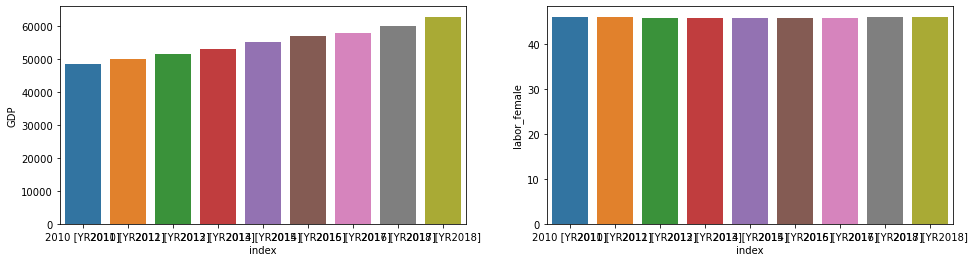

In [177]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

figure, ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2)

figure.set_size_inches(16, 4)

sns.barplot(data=usa_gdp_t, x="index", y="GDP", ax=ax1)
sns.barplot(data=usa_gdp_t, x="index", y="labor_female", ax=ax2)

In [179]:
usa_labor = usa.loc[(usa["Series Code"].str.contains("SL.TLF.TOTL.FE.ZS", na=False))
                  | (usa["Series Code"].str.contains("SP.POP.GROW", na=False))]
usa_labor

Country Name Country Code  \
23724  United States          USA   
23734  United States          USA   

                                             Series        Series Code  \
23724  Labor force, female (% of total labor force)  SL.TLF.TOTL.FE.ZS   
23734                  Population growth (annual %)        SP.POP.GROW   

           2010 [YR2010]      2011 [YR2011]      2012 [YR2012]  \
23724   46.1838904023568   46.1111440993089   45.9391729947311   
23734  0.827846041704304  0.720017688665691  0.727268997193117   

           2013 [YR2013]      2014 [YR2014]      2015 [YR2015]  \
23724   45.9100362437357   45.9658479183952     45.86337744629   
23734  0.686773155567634  0.727517695817155  0.730641178178307   

           2016 [YR2016]      2017 [YR2017]      2018 [YR2018]  \
23724   45.8706799639512   46.0250833060613   46.0536744988158   
23734  0.716669413429853  0.631007893230758  0.522337357899676   

          2019 [YR2019] 2020 [YR2020]  
23724  46.0314198676038            ..  
23734                ..            ..

In [180]:
usa_labor_t = usa_labor.T.iloc[4:13].reset_index()
usa_labor_t

index             23724              23734
0  2010 [YR2010]  46.1838904023568  0.827846041704304
1  2011 [YR2011]  46.1111440993089  0.720017688665691
2  2012 [YR2012]  45.9391729947311  0.727268997193117
3  2013 [YR2013]  45.9100362437357  0.686773155567634
4  2014 [YR2014]  45.9658479183952  0.727517695817155
5  2015 [YR2015]    45.86337744629  0.730641178178307
6  2016 [YR2016]  45.8706799639512  0.716669413429853
7  2017 [YR2017]  46.0250833060613  0.631007893230758
8  2018 [YR2018]  46.0536744988158  0.522337357899676

In [182]:
usa_labor_t = usa_labor_t.rename(columns={23724:"labor_female", 23734: "population"})
usa_labor_t

index      labor_female         population
0  2010 [YR2010]  46.1838904023568  0.827846041704304
1  2011 [YR2011]  46.1111440993089  0.720017688665691
2  2012 [YR2012]  45.9391729947311  0.727268997193117
3  2013 [YR2013]  45.9100362437357  0.686773155567634
4  2014 [YR2014]  45.9658479183952  0.727517695817155
5  2015 [YR2015]    45.86337744629  0.730641178178307
6  2016 [YR2016]  45.8706799639512  0.716669413429853
7  2017 [YR2017]  46.0250833060613  0.631007893230758
8  2018 [YR2018]  46.0536744988158  0.522337357899676

In [184]:
usa_labor_t.dtypes

index           object
labor_female    object
population      object
dtype: object

In [185]:
usa_labor_t[["labor_female", "population"]] = usa_labor_t[["labor_female", "population"]].astype(np.float64)
usa_labor_t.dtypes

index            object
labor_female    float64
population      float64
dtype: object

<AxesSubplot:xlabel='index', ylabel='population'>

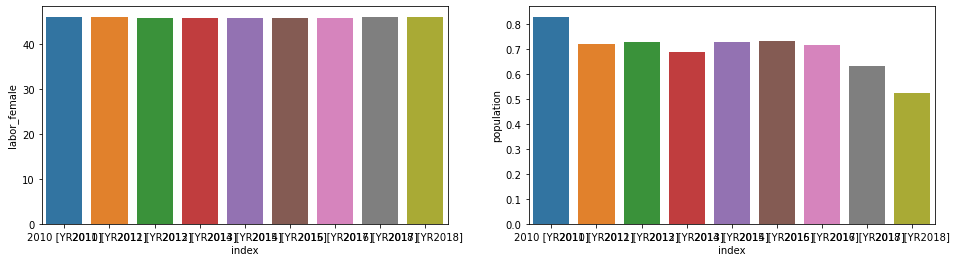

In [186]:
figure, ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2)

figure.set_size_inches(16, 4)

sns.barplot(data=usa_labor_t, x="index", y="labor_female", ax=ax1)
sns.barplot(data=usa_labor_t, x="index", y="population", ax=ax2)